In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-classification/train_star.csv
/kaggle/input/star-classification/sample_submition.csv
/kaggle/input/star-classification/test_star.csv


# Star Classification
<br>
Bu projede yıldızları Büyük ve Normal olmak üzere sınıflandıran model geliştirilmektedir. <br>
<img src="https://www.sydney.edu.au/content/dam/corporate/images/news-and-opinion/news/2022/april/star_types.jpeg/_jcr_content/renditions/cq5dam.web.1280.1280.jpeg">

In [2]:
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/star-classification/train_star.csv")
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf


In [4]:
df["TargetClass"].value_counts()

TargetClass
Giant    15793
Dwarf     4939
Name: count, dtype: int64

In [5]:
df["Class"]=np.where(df["TargetClass"]=="Giant", 1, 0)
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass,Class
0,9.99,7.92,1.61,0.646,G5/G6V,19.483625,Giant,1
1,10.86,3.26,2.12,1.840,M1V:,18.426088,Giant,1
2,8.83,7.57,1.05,0.461,F3V,18.225480,Giant,1
3,7.72,24.80,0.89,0.613,G3IV,19.692257,Giant,1
4,8.81,3.17,1.03,0.872,G6III,16.315296,Dwarf,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20732 entries, 0 to 20731
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         20732 non-null  float64
 1   Plx          20732 non-null  float64
 2   e_Plx        20732 non-null  float64
 3   B-V          20732 non-null  float64
 4   SpType       20732 non-null  object 
 5   Amag         20732 non-null  float64
 6   TargetClass  20732 non-null  object 
 7   Class        20732 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ MB


<Axes: xlabel='Class', ylabel='count'>

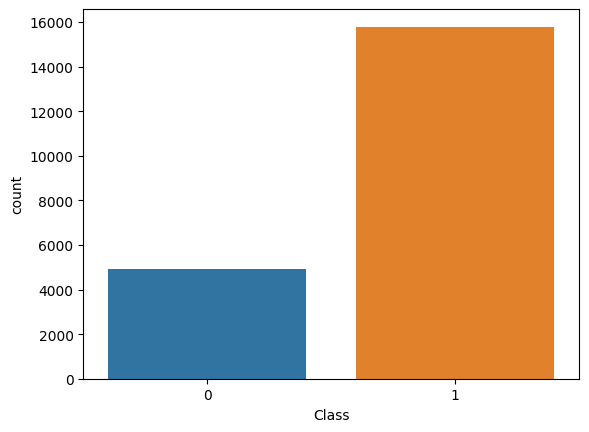

In [7]:
sns.countplot(x=df["Class"])

In [8]:
df["SpType"].value_counts()

SpType
F5V          753
K0III        710
F3V          607
A0V          575
F6V          486
            ... 
B1.5Ia:        1
G8V + K4V      1
A0II           1
K8V:           1
F2IV:          1
Name: count, Length: 1681, dtype: int64

In [9]:
x=df.drop(["SpType", "TargetClass", "Class"], axis=1)
y=df[["Class"]]
x.shape, y.shape

((20732, 5), (20732, 1))

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x, y = smote.fit_resample(x, y)
x.shape, y.shape

((31586, 5), (31586, 1))

<Axes: xlabel='Class', ylabel='count'>

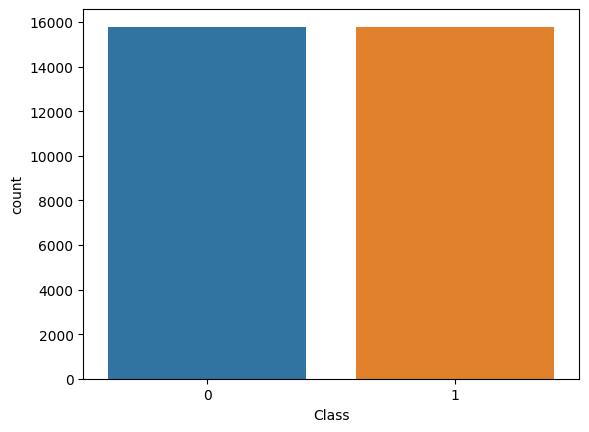

In [11]:
sns.countplot(x=y["Class"])

## Modelleme

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin))
        recall.append(recall_score(y_test, tahmin))
        f1.append(f1_score(y_test, tahmin))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [13]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[4489  278]
 [1816 2893]]
BernoulliNB()  modeli eğitiliyor!..
[[4549  218]
 [4179  530]]
LogisticRegression()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[4056  711]
 [ 438 4271]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[4160  607]
 [ 646 4063]]
RandomForestClassifier()  modeli eğitiliyor!..


/tmp/ipykernel_24/407992637.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=model.fit(x_train,y_train)


[[4377  390]
 [ 426 4283]]
GradientBoostingClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[4140  627]
 [ 450 4259]]
KNeighborsClassifier()  modeli eğitiliyor!..


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[4384  383]
 [ 631 4078]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[4377  390]
 [ 426 4283]]
classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4767
           1       0.92      0.91      0.91      4709

    accuracy                           0.91      9476
   macro avg       0.91      0.91      0.91      9476
weighted avg       0.91      0.91      0.91      9476

Diğer Modeller:


,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.913888,0.916542,0.909535,0.913025
KNeighborsClassifier,0.892993,0.914145,0.866001,0.889422
GradientBoostingClassifier,0.886344,0.871674,0.904438,0.887754
LogisticRegression,0.878746,0.857286,0.906987,0.881436
DecisionTreeClassifier,0.867771,0.870021,0.862816,0.866404
GaussianNB,0.779021,0.912330,0.614355,0.734264
BernoulliNB,0.535986,0.708556,0.112550,0.194246


In [14]:
test=pd.read_csv("/kaggle/input/star-classification/test_star.csv")
test.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,7.91,6.33,1.01,0.843,G5III,16.917019
1,7.35,1.30,0.53,1.304,K1/K2III,12.919716
2,6.75,8.01,0.84,1.019,K1III,16.268162
3,4.47,7.03,0.72,1.283,K4III,13.704777
4,7.33,2.45,1.14,1.600,K5III,14.275830


In [15]:
xt=test.drop("SpType", axis=1)

In [16]:
rf=RandomForestClassifier()
model=rf.fit(x, y)
pred=model.predict(xt)

/tmp/ipykernel_24/3136951064.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=rf.fit(x, y)


In [17]:
pred

array([1, 0, 0, ..., 1, 1, 0])

In [18]:
test["Class"]=pred
test.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,Class
0,7.91,6.33,1.01,0.843,G5III,16.917019,1
1,7.35,1.30,0.53,1.304,K1/K2III,12.919716,0
2,6.75,8.01,0.84,1.019,K1III,16.268162,0
3,4.47,7.03,0.72,1.283,K4III,13.704777,0
4,7.33,2.45,1.14,1.600,K5III,14.275830,0


In [19]:
test["TargetClass"]=np.where(test["Class"]==1, "Giant", "Dwarf")
test.sample(10)


,Vmag,Plx,e_Plx,B-V,SpType,Amag,Class,TargetClass
8187,8.63,2.29,1.06,1.319,K1III,15.429178,0,Dwarf
18176,8.44,6.72,1.15,1.298,K2IIICN...,17.576847,0,Dwarf
3715,6.44,2.58,0.76,1.614,K4/K5III,13.498098,0,Dwarf
14972,6.93,0.92,0.82,0.220,A2III,11.748940,0,Dwarf
3824,8.53,2.02,1.08,1.032,K0III,15.056757,0,Dwarf
14404,7.75,5.13,0.93,1.032,G8III,16.300587,0,Dwarf
16170,10.54,-0.36,1.58,0.889,Bep + M5III,13.321512,0,Dwarf
6351,8.09,3.36,0.70,1.144,K1III,15.721697,0,Dwarf
10377,8.35,8.82,1.00,0.465,F3V,18.077343,1,Giant
6896,6.55,12.04,0.55,0.092,A2V,16.953133,1,Giant


In [20]:
test[["TargetClass"]].reset_index().rename(columns={'index': 'index'}).to_csv('submission.csv', index=False)

## Sonuç

Bu projede yıldız türlerini tahmin eden sınıflandırma modelleri denenmiştir. %90'ın üzerinde başarı elde edilmiştir. Oluşturulan submission.csv dosyası yarışmaya birkaç kere yüklenmesine rağmen sistemin hata vermesinden dolayı bir skor elde edilememiştir.